In [1]:
# Question:
# Epilepsy is a nervous system disorder that affects movement. The dataset contains 195 records of various people with 23 features that contain
# biomedical measurements. 
# Your model will be used to differentiate healthy people from people having the disease. Target Column is 'status'.
# Identify the model with the best params

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns 

In [6]:
df = pd.read_csv("C:\\Users\\Ankita\\Downloads\\epilepsy.data")
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [7]:
df.shape

(195, 24)

In [8]:
df.sample(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
73,phon_R01_S19_2,112.014,588.518,107.024,0.00533,0.00005,0.00268,0.00329,0.00805,0.02448,...,0.04120,0.00623,24.178,1,0.509127,0.789532,-5.389129,0.306636,1.928708,0.225461
128,phon_R01_S32_1,119.031,127.533,109.216,0.00440,0.00004,0.00214,0.00192,0.00641,0.01033,...,0.01614,0.01724,26.842,1,0.457541,0.699787,-6.890021,0.152941,2.328513,0.112856
187,phon_R01_S49_5,116.342,581.289,94.246,0.00267,0.00002,0.00115,0.00148,0.00345,0.01300,...,0.01892,0.00680,25.023,0,0.528485,0.663884,-6.359018,0.116636,2.152083,0.138868
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
65,phon_R01_S17_6,228.969,239.541,113.201,0.00238,0.00001,0.00136,NaN,0.00408,0.01745,...,0.02827,0.00420,24.547,0,0.305429,0.681811,-7.314237,0.006274,2.118596,0.091546


In [9]:
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            2
Jitter:DDP          1
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [10]:
df.isna().mean()*100

name                0.000000
MDVP:Fo(Hz)         0.000000
MDVP:Fhi(Hz)        0.000000
MDVP:Flo(Hz)        0.000000
MDVP:Jitter(%)      0.000000
MDVP:Jitter(Abs)    0.000000
MDVP:RAP            0.000000
MDVP:PPQ            1.025641
Jitter:DDP          0.512821
MDVP:Shimmer        0.000000
MDVP:Shimmer(dB)    0.000000
Shimmer:APQ3        0.000000
Shimmer:APQ5        0.000000
MDVP:APQ            0.000000
Shimmer:DDA         0.000000
NHR                 0.000000
HNR                 0.000000
status              0.000000
RPDE                0.000000
DFA                 0.000000
spread1             0.000000
spread2             0.000000
D2                  0.000000
PPE                 0.000000
dtype: float64

In [31]:
df['MDVP:PPQ'].fillna(1, inplace = True)

In [33]:
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          1
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [41]:
df['Jitter:DDP'].fillna(, inplace = True)

C:\Users\Ankita\AppData\Local\Temp\ipykernel_6572\955484884.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Jitter:DDP'].fillna(1, inplace = True)


In [42]:
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [18]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
190    False
191    False
192    False
193    False
194    False
Length: 195, dtype: bool

In [19]:
df['status'].describe()

count    195.000000
mean       0.753846
std        0.431878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: status, dtype: float64

In [20]:
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

<Axes: xlabel='status'>

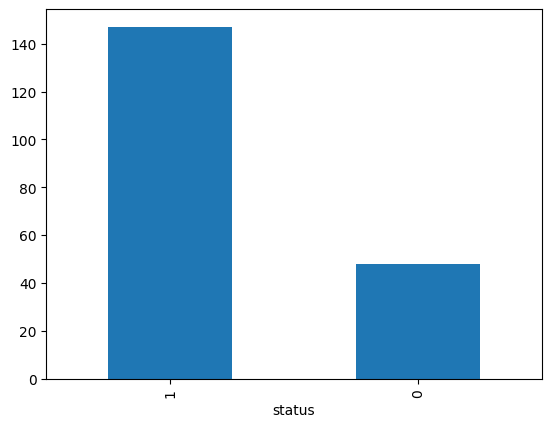

In [31]:
df['status'].value_counts().plot(kind = 'bar')

<Axes: ylabel='count'>

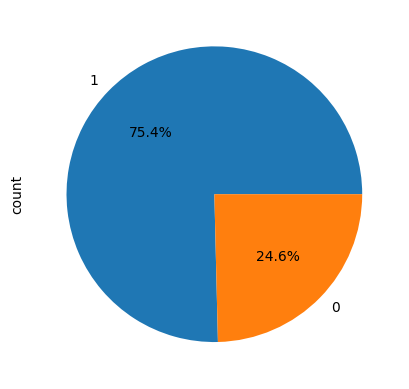

In [32]:
df['status'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

<Axes: ylabel='spread1'>

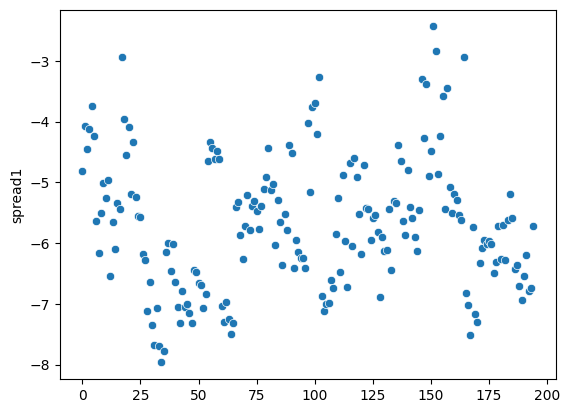

In [75]:
sns.scatterplot(df['spread1'])

In [44]:
X = df.drop(columns = ['status','name'])
y = df[['status']]

In [45]:
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [46]:
y

,status
0,1
1,1
2,1
3,1
4,1
...,...
190,0
191,0
192,0
193,0


In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((136, 22), (59, 22))

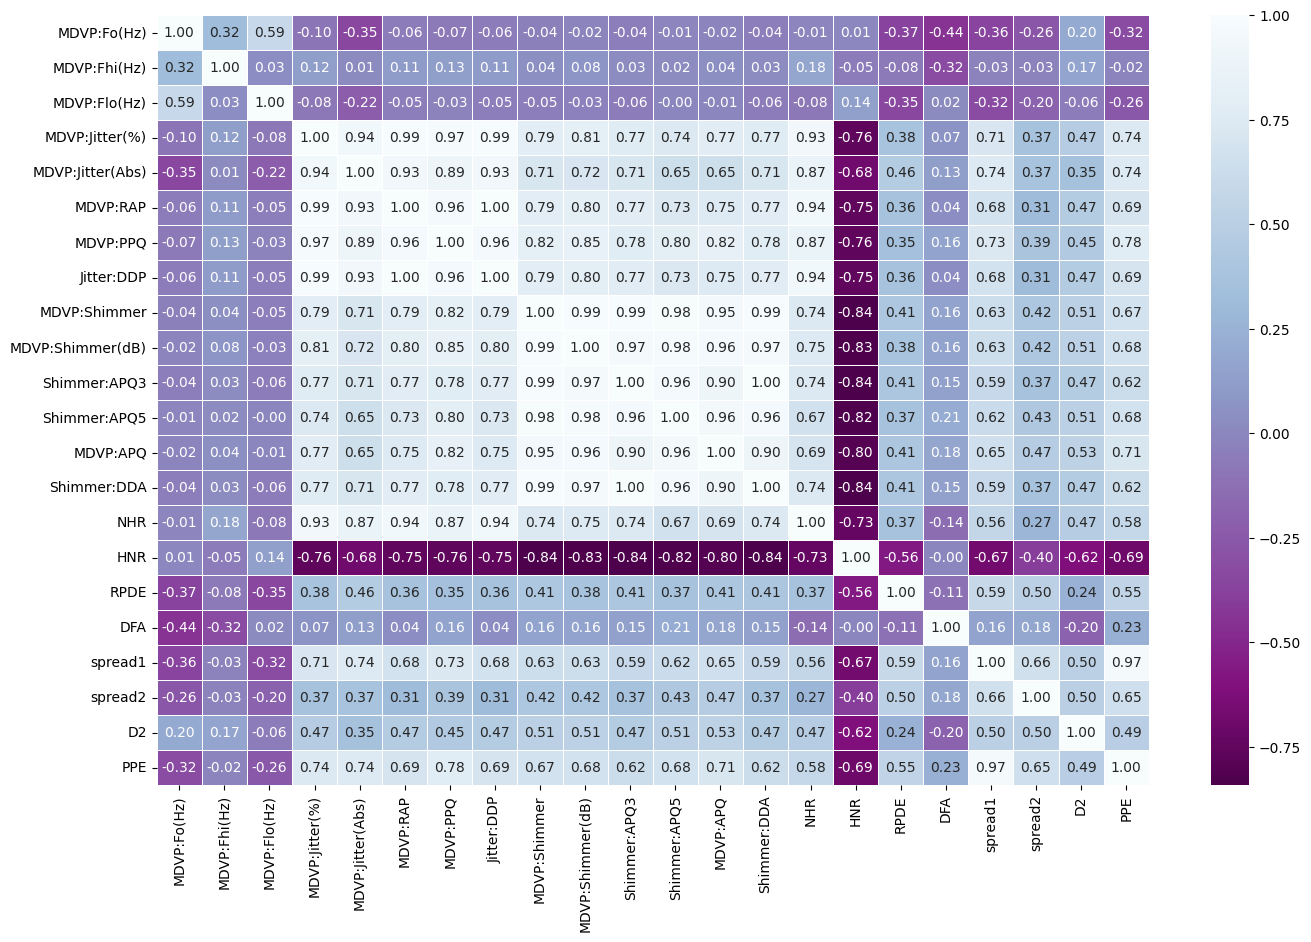

In [48]:
cor = X_train.corr()
plt.figure(figsize = (16,10))
sns.heatmap(cor, annot = True, linewidths=0.5,fmt=".2f", cmap = "BuPu_r")
plt.show()

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [51]:
X_train

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
149,202.632,565.740,177.258,0.01627,0.000080,0.00919,0.00963,0.02756,0.07170,0.833,...,0.06460,0.10546,0.07889,14.989,0.427627,0.775708,-4.892495,0.262281,2.910213,0.270173
180,150.440,163.441,144.736,0.00396,0.000030,0.00206,0.00233,0.00619,0.02551,0.237,...,0.02148,0.03964,0.00611,23.133,0.352396,0.759320,-6.261446,0.183218,2.264226,0.144105
54,108.807,134.656,102.874,0.00761,0.000070,0.00349,0.00486,0.01046,0.02719,0.255,...,0.02067,0.04450,0.01036,21.028,0.536009,0.819032,-4.649573,0.205558,1.986899,0.316700
159,127.930,138.752,112.173,0.00605,0.000050,0.00321,0.00318,0.00962,0.03235,0.339,...,0.03105,0.04079,0.02663,19.651,0.654945,0.675865,-5.498456,0.234196,2.103014,0.216638
16,144.188,349.259,82.764,0.00544,0.000040,0.00211,0.00292,0.00632,0.02047,0.192,...,0.02074,0.02908,0.01859,22.333,0.567380,0.644692,-5.440040,0.239764,2.264501,0.218164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,150.258,154.609,75.349,0.00248,0.000020,0.00105,0.00136,0.00315,0.01131,0.107,...,0.01009,0.01567,0.00495,26.759,0.296888,0.722356,-6.878393,0.089267,2.004055,0.113942
67,136.969,166.607,66.004,0.00923,0.000070,0.00507,0.00463,0.01520,0.03111,0.308,...,0.02603,0.04914,0.02659,19.979,0.498133,0.729067,-5.324574,0.205660,2.291558,0.226247
117,170.756,450.247,79.032,0.00555,0.000030,0.00244,0.00261,0.00731,0.01725,0.175,...,0.01652,0.02270,0.01802,25.690,0.486738,0.676023,-4.597834,0.372114,2.975889,0.282780
47,252.455,261.487,182.786,0.00185,0.000007,0.00092,0.00113,0.00276,0.01152,0.103,...,0.00860,0.01841,0.00432,26.805,0.610367,0.635204,-7.319510,0.200873,2.028612,0.086398


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

C:\Users\Ankita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [64]:
y_pred = lr.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


C:\Users\Ankita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [65]:
from sklearn.metrics import accuracy_score
print("Accuracy LR",accuracy_score(y_test,y_pred))
print(lr.score(X_train,y_train))   
print(lr.score(X_test,y_test))    

Accuracy LR 0.22033898305084745
0.25735294117647056
0.22033898305084745


C:\Users\Ankita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Ankita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [66]:
# GAUSSIAN NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# train the model
gnb.fit(X_train, y_train)
# make predictions
gnb_pred = gnb.predict(X_test)
# print the accuracy
print("Accuracy of Gaussian Naive Bayes: ",
      accuracy_score(y_test, gnb_pred))
# print other performance metrics
print("Precision of Gaussian Naive Bayes: ",
      precision_score(y_test, gnb_pred, average='weighted'))
print("Recall of Gaussian Naive Bayes: ",
      recall_score(y_test, gnb_pred, average='weighted'))
print("F1-Score of Gaussian Naive Bayes: ",
      f1_score(y_test, gnb_pred, average='weighted'))

 



Accuracy of Gaussian Naive Bayes:  0.6779661016949152
Precision of Gaussian Naive Bayes:  0.8691737288135594
Recall of Gaussian Naive Bayes:  0.6779661016949152
F1-Score of Gaussian Naive Bayes:  0.7040425147692388


C:\Users\Ankita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
# DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
# train the model
dt.fit(X_train, y_train)
# make predictions
dt_pred = dt.predict(X_test)
# print the accuracy
print("Accuracy of Decision Tree Classifier: ",
      accuracy_score(y_test, dt_pred))
# print other performance metrics
print("Precision of Decision Tree Classifier: ",
      precision_score(y_test, dt_pred, average='weighted'))
print("Recall of Decision Tree Classifier: ",
      recall_score(y_test, dt_pred, average='weighted'))
print("F1-Score of Decision Tree Classifier: ",
      f1_score(y_test, dt_pred, average='weighted'))

Accuracy of Decision Tree Classifier:  0.8813559322033898
Precision of Decision Tree Classifier:  0.8948807646826962
Recall of Decision Tree Classifier:  0.8813559322033898
F1-Score of Decision Tree Classifier:  0.8854930752106331


In [68]:
# SUPPORT VECTOR MACHINE
from sklearn import svm
svm_clf = svm.SVC(kernel='linear')  # Linear Kernel
# train the model
svm_clf.fit(X_train, y_train)
# make predictions
svm_clf_pred = svm_clf.predict(X_test)
# print the accuracy
print("Accuracy of Support Vector Machine: ",
      accuracy_score(y_test, svm_clf_pred))
# print other performance metrics
print("Precision of Support Vector Machine: ",
      precision_score(y_test, svm_clf_pred, average='weighted'))
print("Recall of Support Vector Machine: ",
      recall_score(y_test, svm_clf_pred, average='weighted'))
print("F1-Score of Support Vector Machine: ",
      f1_score(y_test, svm_clf_pred, average='weighted'))

Accuracy of Support Vector Machine:  0.9322033898305084
Precision of Support Vector Machine:  0.9376271186440678
Recall of Support Vector Machine:  0.9322033898305084
F1-Score of Support Vector Machine:  0.927452491011813


C:\Users\Ankita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
